# **Imports**

In [10]:
pip install minisom

# **Importing Dataset**

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/Credit_Card_Applications.csv')

data = data.drop(columns=['CustomerID', 'Class'])

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

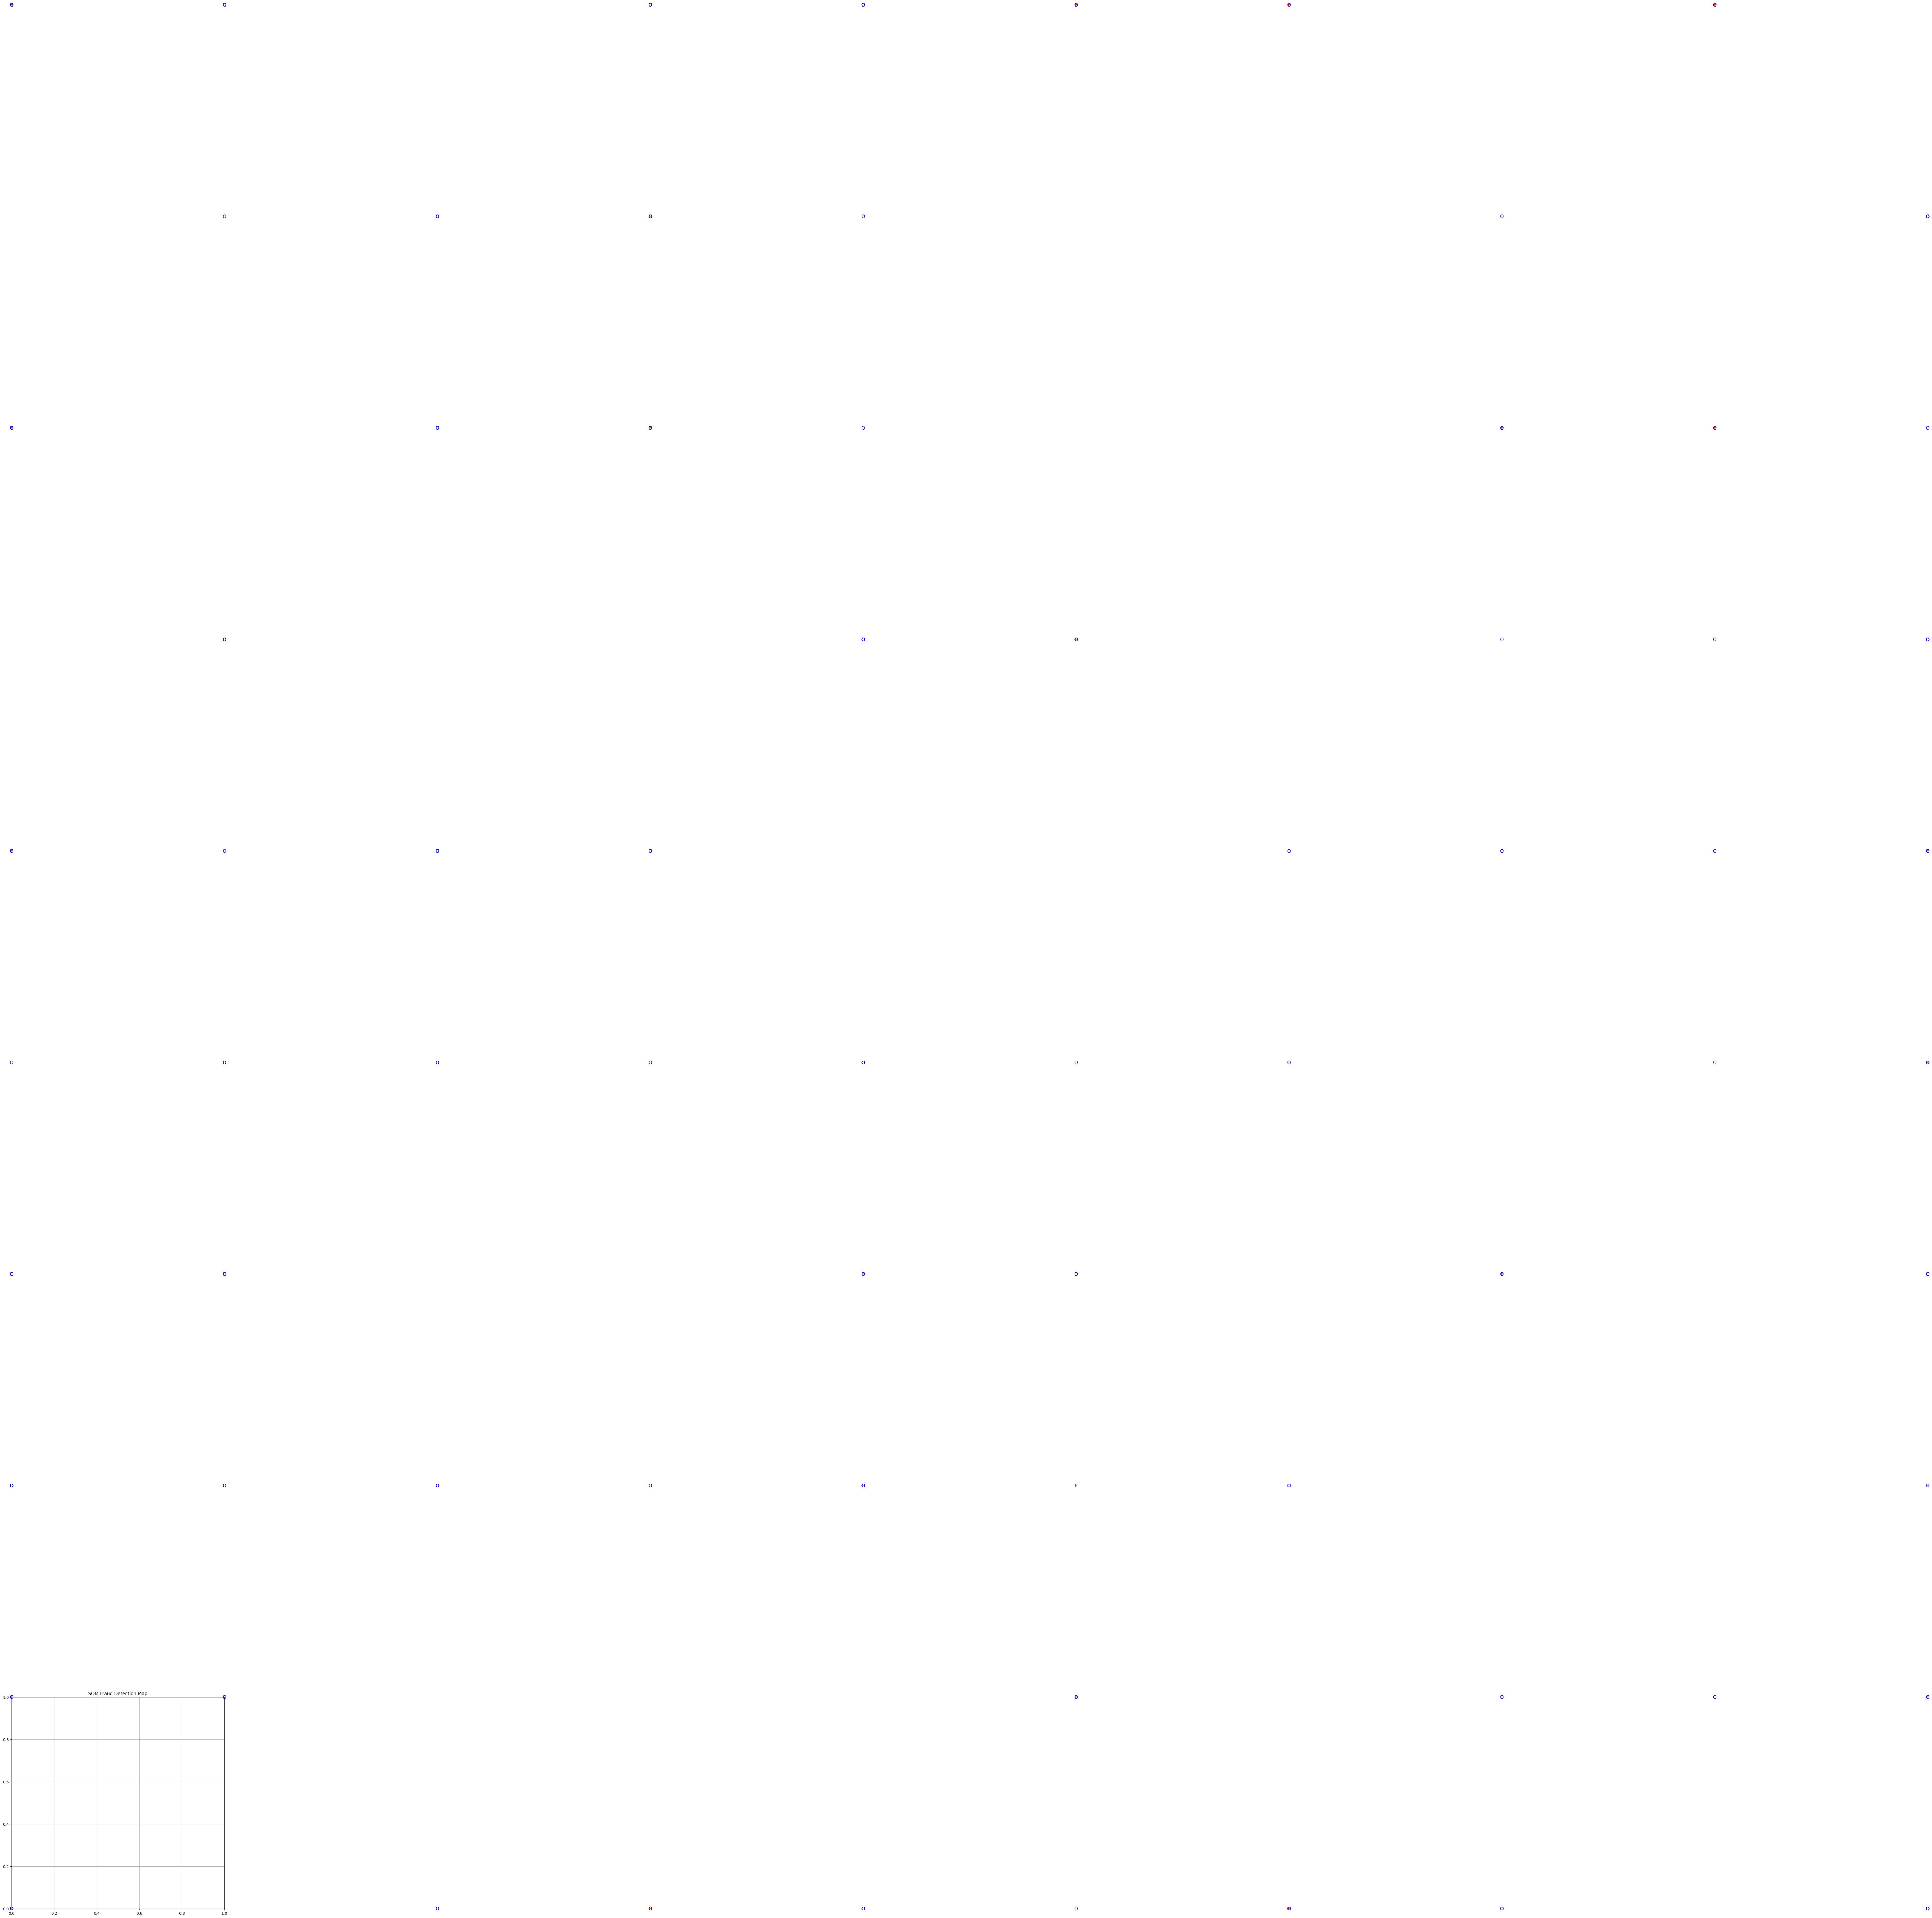

Detected fraud applications (Top 5% quantization error):
     A1     A2      A3  A4  A5  A6      A7  A8  A9  A10  A11  A12   A13  \
35    1  74.83  19.000   1   1   1   0.040   0   1    2    0    2     0   
70    1  48.75  26.335   1   1   1   0.000   1   0    0    1    2     0   
128   0  46.00   4.000   2   5   3   0.000   1   0    0    0    2   100   
143   1  64.08  20.000   2  14   8  17.500   1   1    9    1    2     0   
145   0  68.67  15.000   2  10   9   0.000   1   1   14    0    2     0   
146   1  76.75  22.290   2  10   9  12.750   1   1    1    1    2     0   
170   0  27.67   1.500   2   7   4   2.000   1   0    0    0    1   368   
176   0  56.83   4.250   1   1   1   5.000   0   0    0    1    2     0   
177   0  53.33   0.165   2   1   1   0.000   0   0    0    1    1    62   
182   1  25.67  12.500   2  13   4   1.210   1   1   67    1    2   140   
233   1  56.42  28.000   1   8   4  28.500   1   1   40    0    2     0   
234   0  64.08   0.165   2   1   1   0.000 

In [12]:
from minisom import MiniSom
import matplotlib.pyplot as plt

som_grid_rows, som_grid_columns = 10, 10
sigma = 1.0
learning_rate = 0.5
som = MiniSom(som_grid_rows, som_grid_columns, data_scaled.shape[1], sigma=sigma, learning_rate=learning_rate)

som.random_weights_init(data_scaled)

som.train_random(data_scaled, 100)

quantization_errors = np.array([np.linalg.norm(x - som.get_weights()[som.winner(x)]) for x in data_scaled])

threshold = np.percentile(quantization_errors, 95)
fraud_indices = np.where(quantization_errors > threshold)[0]

plt.figure(figsize=(10, 10))

for i, x in enumerate(data_scaled):
    w = som.winner(x)
    if i in fraud_indices:
        plt.text(w[0], w[1], 'F', ha='center', va='center', color='red', fontsize=12)
    else:
        plt.text(w[0], w[1], 'O', ha='center', va='center', color='blue', fontsize=12)

plt.title('SOM Fraud Detection Map')
plt.grid()
plt.show()

fraud_data = data.iloc[fraud_indices]
print(f"Detected fraud applications (Top 5% quantization error):\n{fraud_data}")

# **Applications of Self-Organizing Networks**

* **Simplifying Data for Visualization:**

Self-Organizing Maps (SOMs) convert complex, high-dimensional data into a more
manageable, often 2D, format. This dimensionality reduction aids in visualizing patterns and trends, making it easier to interpret the data.
Example: Visualizing customer groups based on purchasing behavior to assist in market segmentation.

* **Outlier and Anomaly Identification:**

SOMs excel at spotting unusual patterns or outliers that deviate from typical data clusters, making them effective for anomaly detection.
Example: Detecting abnormal credit card transactions or identifying suspicious network traffic patterns.

* **Automatic Grouping and Pattern Recognition:**

SOMs can automatically organize data points into clusters, helping to identify inherent groupings or recurring patterns.
Example: Automatically clustering similar images for use in object recognition.

* **Analyzing Biological and Genetic Information:**

SOMs are useful in bioinformatics, where they can uncover patterns in complex biological data such as gene expression or protein structures.
Example: Grouping genes with similar expression levels under different experimental conditions.

# **Loss Function for Self-Organizing Maps (SOMs)**
* **SOMs and Performance Metrics:**

Unlike traditional supervised learning methods, Self-Organizing Maps (SOMs) don’t rely on typical loss functions like mean squared error in regression. Instead, quantization error is commonly used to evaluate SOM performance.

* **Quantization Error:**

Quantization error reflects the difference between an input vector and its Best Matching Unit (BMU). It serves as an indicator of how effectively the SOM has captured the underlying data distribution.

* **Interpreting Quantization Error:**

Lower quantization error suggests that the SOM has successfully learned the data patterns. In contrast, higher errors may signal that the SOM is struggling, which could be due to outliers or inadequate training.

In [14]:
quantization_error = np.mean([
    np.linalg.norm(x - som.get_weights()[bmu[0], bmu[1]])
    for x in data_scaled
    for bmu in [som.winner(x)]
])
print(f'Quantization Error: {quantization_error}')

Quantization Error: 0.44071226541213765


#**Limitations of Kohonen Maps (SOMs):**
* **Limited Scalability:**

Training SOMs on large datasets can be slow and resource-intensive. As the size of the dataset or the complexity of the input data increases, the computational cost grows rapidly.
Example: In environments with millions of records, such as big data applications, SOMs may take an impractically long time to train.

* **High-Dimensional Data Challenges:**

SOMs tend to perform well with low to medium-dimensional data but struggle with very high-dimensional datasets. As the number of features increases, it becomes harder to map this data accurately onto a 2D grid.
Example: When working with datasets containing thousands of variables, SOMs may fail to capture key patterns effectively.

* **Sensitivity to Hyperparameters:**

The performance of SOMs is highly dependent on the correct tuning of several hyperparameters, such as the grid size, learning rate, and neighborhood radius. Improper tuning can result in poor model performance or failure to converge.
Example: A high learning rate can cause the SOM to oscillate without finding a stable solution, while a low learning rate may result in slow or incomplete learning.

* **Difficulty in Interpretation:**

While SOMs generate visual maps, interpreting the resulting clusters can be challenging, especially for complex or highly non-linear data. The clusters may not always provide clear insights into the relationships within the data.
